In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()

In [2]:
train_data = pd.read_csv("Train_Claim.csv", na_values=["?", "MISSEDDATA"])

train_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails,ReportedFraud
0,Cust10000,03-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,36093,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917,N
1,Cust10001,02-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,36845,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006,N
2,Cust10002,15-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,36934,State3,500/1000,617,1373.38,0,wife,VehicleModel,Jetta,N
3,Cust10003,19-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,38453,State2,500/1000,722,1337.60,0,own-child,VehicleID,Vehicle37363,N
4,Cust10004,09-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,35363,State2,100/300,500,1353.73,4279863,unmarried,VehicleID,Vehicle28633,N


In [3]:
def get_categorical_columns(df):
    categorical_columns = []
    threshold = 8000
    object_columns = df.select_dtypes(include=['object']).columns

    unique_values = df[object_columns].nunique()
    print(unique_values)
    for k, v in unique_values.items():
        if v <= threshold:
            categorical_columns.append(k)

    return categorical_columns

In [4]:
# Preprocessing

# Dropping rows with NA values. 
train_data = train_data.dropna()


# Removing "Cust" from CustomerId and "Location" from IncidentAddress.
train_data['CustomerID'] = train_data['CustomerID'].str.replace('Cust', '')
train_data['IncidentAddress'] = train_data['IncidentAddress'].str.replace('Location ', '').astype('int64').astype('int32')


# Converting dates to numeric values.
train_data['DateOfIncident'] = pd.to_datetime(train_data['DateOfIncident'], format='%d-%m-%Y')
train_data['DateOfIncident'] = train_data['DateOfIncident'].astype('int64').astype('int32')
train_data['DateOfPolicyCoverage'] = train_data['DateOfPolicyCoverage'].astype('int64').astype('int32')


In [5]:
# train_data["ReportedFraud"].value_counts(normalize=True)

In [6]:
# Splitting train and test data. 
x = train_data.drop('ReportedFraud', axis=1)
y = train_data['ReportedFraud']

# Perform one-hot encoding on the categorical columns
categorical_columns = get_categorical_columns(x)
x = pd.get_dummies(x, columns=categorical_columns)

y = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


CustomerID                    9692
TypeOfIncident                   4
TypeOfCollission                 3
SeverityOfIncident               4
AuthoritiesContacted             5
IncidentState                    7
IncidentCity                     7
PropertyDamage                   2
Witnesses                        5
PoliceReport                     2
InsuredGender                    2
InsuredEducationLevel            7
InsuredOccupation               14
InsuredHobbies                  20
Country                          2
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
InsuredRelationship              6
VehicleAttribute                 4
VehicleAttributeDetails       2460
dtype: int64


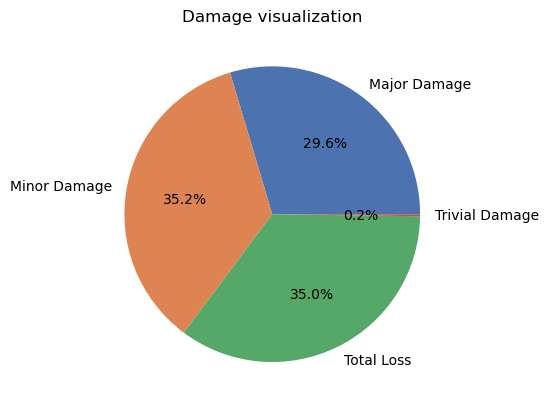

In [8]:
severity_index=train_data.groupby(['SeverityOfIncident']).size().index
severity_values=train_data.groupby(['SeverityOfIncident']).size().values
colors=sns.color_palette('deep')
plt.pie(x=severity_values,labels=severity_index,colors=colors,autopct='%.1f%%')
plt.title('Damage visualization')
plt.show()

In [10]:
# Using Random Forest Classifier.

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)

acc_score = accuracy_score(y_test, predrfc)
f1score = f1_score(y_test, predrfc)
con_matrix = confusion_matrix(y_test, predrfc)
cla_report = classification_report(y_test, predrfc)
auc = roc_auc_score(y_test, predrfc)
fpr, tpr, thresholds = roc_curve(y_test, predrfc)

print(acc_score * 100)
print(f1score * 100)
print(con_matrix)
print(cla_report)
print(auc)

91.81568088033012
83.98384925975773
[[2046   42]
 [ 196  624]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2088
           1       0.94      0.76      0.84       820

    accuracy                           0.92      2908
   macro avg       0.92      0.87      0.89      2908
weighted avg       0.92      0.92      0.92      2908

0.870430333613681
